# auto MPG

In [684]:
# 모듈로딩
from urllib.request import urlopen,urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [685]:
# 데이터 불러오기
urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data','./autompg.csv')
urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names','./desci_autompg.txt')
urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original','./orgin_autompg.csv')

('./orgin_autompg.csv', <http.client.HTTPMessage at 0x1e64a963be0>)

- autompg.csv는 우리가 분석할때 사용할 데이터
- desci_autompg.txt는 우리가 분석할 데이터의 설명
- orgin_autompg.csv는 원본 데이터 인듯 => 행수가 점더 많음

In [686]:
# 데이터 를 데프 형태로 만들기
# re(정규표현식) => \s:화이트 스페이스
autompg_df=pd.read_csv('./autompg.csv',header=None,sep='\s+')
print(type(autompg_df))

<class 'pandas.core.frame.DataFrame'>


- 데프인 것을 확인
- 1. mpg(연비):           continuous  
  2. cylinders(실린더):     multi-valued discrete  
  3. displacement(이동):  continuous  
  4. horsepower(마력):    continuous  
  5. weight(무게):        continuous  
  6. acceleration(가속도):  continuous  
  7. model year(모델년도):    multi-valued discrete  
  8. origin(출신, 근원):        multi-valued discrete  
  9. car name(차 이름):      string (unique for each instance)  

In [687]:
# 열이름 변경
autompg_df.columns=['MPG','Cyl','Dis','HP','Weight','Acc','Model_year','Origin','Car_name']

In [688]:
# 정보 확인하기
autompg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MPG         398 non-null    float64
 1   Cyl         398 non-null    int64  
 2   Dis         398 non-null    float64
 3   HP          398 non-null    object 
 4   Weight      398 non-null    float64
 5   Acc         398 non-null    float64
 6   Model_year  398 non-null    int64  
 7   Origin      398 non-null    int64  
 8   Car_name    398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- HP열은 연속형인데 object로 되어 있어서 변경이 필요해 보임
- 웹사이트에서는 결측치가 있다고 했는데 결측치는 없음???? 왜 없는지 찾아보자
- Car_name의 중복된 데이터가 있는지 확인 해보자
- Model_year년도에서 가장 많은 년도 비중을 차지하는 곳을 찾아보자


### 각 열의 고유값 확인

In [689]:
# mpg의 고유값
autompg_df.MPG.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

- 모두 실수이므로 넘어감

In [690]:
autompg_df.Cyl.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cyl, dtype: int64

In [691]:
# Cyl의 고유값
print(f"Cyl 고유값은 {autompg_df.Cyl.unique()}, 고유값의 개수는 {autompg_df.Cyl.nunique()}")
print(f"Cyl 고유값의 빈도표\n{autompg_df.Cyl.value_counts()}")

Cyl 고유값은 [8 4 6 3 5], 고유값의 개수는 5
Cyl 고유값의 빈도표
4    204
8    103
6     84
3      4
5      3
Name: Cyl, dtype: int64


- Cyl에는 총 5개의 범주가 있다.
- 3과 5의 실린더값의 개수 너무 작음  
  이상값인지 확인 해보자
- 실린더는 3/4/5/6/8/12/16기통이 있으므로 이상치같은 것은 아닌 것으로 확인

In [692]:
# Dis의 고유값
print(f"Dis 고유값은 {autompg_df.Dis.unique()}, 고유값의 개수는 {autompg_df.Dis.nunique()}")
print(f"Dis 고유값의 빈도표\n{autompg_df.Dis.value_counts()}")

Dis 고유값은 [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  101.  305.   85.  130.  168.
 111.  260.  151.  146.   80.   78.  105.  131.  163.   89.  267.   86.
 183.  141.  173.  135.   81.  100.  145.  112.  181.  144. ], 고유값의 개수는 82
Dis 고유값의 빈도표
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: Dis, Length: 82, dtype: int64


- 고유값이 다 수치형이라 패쓰

In [693]:
# HP의 고유값
print(f"HP 고유값은 {autompg_df.HP.unique()}")
print(f"HP 고유값의 빈도표\n{autompg_df.HP.value_counts()}")

HP 고유값은 ['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
HP 고유값의 빈도표
150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
61.00     1
93.00     1
148.0     1
152.0     1
82.00     1
Name: HP, Length: 94, dtype: int64


- 물음표(?)가 하나 고유값에 포함되어 있다.  
  이것을 어떻게 처리할지 고민 해봐야겠다.

Weight 고유값은 [3504. 3693. 3436. 3433. 3449. 4341. 4354. 4312. 4425. 3850. 3563. 3609.
 3761. 3086. 2372. 2833. 2774. 2587. 2130. 1835. 2672. 2430. 2375. 2234.
 2648. 4615. 4376. 4382. 4732. 2264. 2228. 2046. 2634. 3439. 3329. 3302.
 3288. 4209. 4464. 4154. 4096. 4955. 4746. 5140. 2962. 2408. 3282. 3139.
 2220. 2123. 2074. 2065. 1773. 1613. 1834. 1955. 2278. 2126. 2254. 2226.
 4274. 4385. 4135. 4129. 3672. 4633. 4502. 4456. 4422. 2330. 3892. 4098.
 4294. 4077. 2933. 2511. 2979. 2189. 2395. 2288. 2506. 2164. 2100. 4100.
 3988. 4042. 3777. 4952. 4363. 4237. 4735. 4951. 3821. 3121. 3278. 2945.
 3021. 2904. 1950. 4997. 4906. 4654. 4499. 2789. 2279. 2401. 2379. 2124.
 2310. 2472. 2265. 4082. 4278. 1867. 2158. 2582. 2868. 3399. 2660. 2807.
 3664. 3102. 2875. 2901. 3336. 2451. 1836. 2542. 3781. 3632. 3613. 4141.
 4699. 4457. 4638. 4257. 2219. 1963. 2300. 1649. 2003. 2125. 2108. 2246.
 2489. 2391. 2000. 3264. 3459. 3432. 3158. 4668. 4440. 4498. 4657. 3907.
 3897. 3730. 3785. 3039. 3221. 3169. 21

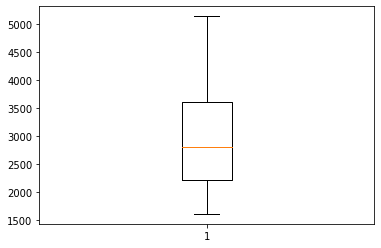

In [694]:
# Weight의 고유값
print(f"Weight 고유값은 {autompg_df.Weight.unique()}")
plt.boxplot(autompg_df.Weight)
plt.show()

- Weight열에는 이상치는 없는 것으로 확인

Weight 고유값은 [12.  11.5 11.  10.5 10.   9.   8.5  8.   9.5 15.  15.5 16.  14.5 20.5
 17.5 12.5 14.  13.5 18.5 19.  13.  19.5 18.  17.  23.5 16.5 21.  16.9
 14.9 17.7 15.3 13.9 12.8 15.4 17.6 22.2 22.1 14.2 17.4 16.2 17.8 12.2
 16.4 13.6 15.7 13.2 21.9 16.7 12.1 14.8 18.6 16.8 13.7 11.1 11.4 18.2
 15.8 15.9 14.1 21.5 14.4 19.4 19.2 17.2 18.7 15.1 13.4 11.2 14.7 16.6
 17.3 15.2 14.3 20.1 24.8 11.3 12.9 18.8 18.1 17.9 21.7 23.7 19.9 21.8
 13.8 12.6 16.1 20.7 18.3 20.4 19.6 17.1 15.6 24.6 11.6]


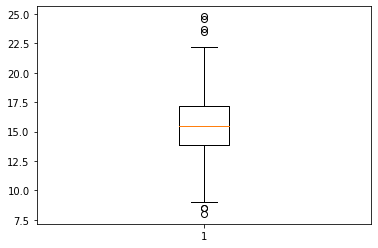

In [695]:
# Acc의 고유값
print(f"Weight 고유값은 {autompg_df.Acc.unique()}")
plt.boxplot(autompg_df.Acc)
plt.show()

- 박스플롯으로 이상치들은 보이지만 Acc열 자체가 가속도이므로 심하게 이상치가 아닌 이상
  데이터에 포함시키고 분석을 진행할 생각

In [696]:
# Model_year의 고유값
print(f"Model_year의 빈도표\n{autompg_df.Model_year.value_counts()}")

Model_year의 빈도표
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: Model_year, dtype: int64


- 년도별 차 개수를 알 수 있음 70~82년 까지 분포해 있는 것을 확인

In [697]:
# Origin의 고유값
print(f"Origin 고유값은 {autompg_df.Origin.unique()}")
print(f"Origin 빈도표\n{autompg_df.Origin.value_counts()}")

Origin 고유값은 [1 3 2]
Origin 빈도표
1    249
3     79
2     70
Name: Origin, dtype: int64


- Origin은 솔직히 아직까지 먼지 모르겠다. 1/2/3으로 범주는 적은데 멀 나타내는 것일까??

In [698]:
# Car_name 의 고유값
print(f"Car_name  고유값 개수는 {autompg_df.Car_name .nunique()}")
print(f"Car_name  빈도표\n{autompg_df.Car_name .value_counts()}")

Car_name  고유값 개수는 305
Car_name  빈도표
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: Car_name, Length: 305, dtype: int64


- 차이름이 중복되는 것들도 있다.
- 차이름이 같으면 데이터도 같은 것이 아닐까??? 확인해보자

### 연비를 우리나라에 맞게 바꾸기

In [699]:
autompg_df['Mpg_kr']=round(autompg_df.MPG*0.4251437056332947,4)

### Weight를 파운드에서 KG으로 바꾸기

In [700]:
autompg_df['Weight_KG']=round(autompg_df.Weight*0.453592,4)

### Acc는 가속

In [701]:
autompg_df['Accinter']=pd.qcut(sorted(autompg_df.Acc),3,)

In [702]:
# Accinter을 범주형으로
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
autompg_df['Accinter']=le.fit_transform(autompg_df.Accinter)

In [703]:
autompg_df

,MPG,Cyl,Dis,HP,Weight,Acc,Model_year,Origin,Car_name,Mpg_kr,Weight_KG,Accinter
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,7.6526,1589.3864,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.3772,1675.1153,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.6526,1558.5421,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.8023,1557.1813,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.2274,1564.4388,0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,11.4789,1265.5217,2
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,18.7063,966.1510,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,13.6046,1040.9936,2
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,11.9040,1190.6790,2


### HP의 ?를 처리하기

In [704]:
# HP가 ?표인 행을 찾기
autompg_df[autompg_df.HP=='?']

,MPG,Cyl,Dis,HP,Weight,Acc,Model_year,Origin,Car_name,Mpg_kr,Weight_KG,Accinter
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto,10.6286,928.0492,0
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick,8.9280,1304.0770,0
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe,17.3884,832.3413,2
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra,10.0334,1317.6848,2
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i,14.6675,1052.3334,2
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl,9.7783,1376.6517,2


In [705]:
# 예전에 인터넷으로 뒤져서 찾아 놓은 정보를 활용하여 값을 변경
autompg_df.iloc[32,3]=75
autompg_df.iloc[126,3]=140
autompg_df.iloc[330,3]=53.3
autompg_df.iloc[336,3]=120
autompg_df.iloc[354,3]=81.5
autompg_df.iloc[374,3]=82

In [706]:
# 값이 변경 되었는지 확인
autompg_df[autompg_df.HP=='?']

,MPG,Cyl,Dis,HP,Weight,Acc,Model_year,Origin,Car_name,Mpg_kr,Weight_KG,Accinter


In [707]:
# 타입변경
autompg_df.HP=autompg_df.HP.astype('float')

- 이제 물음표 값이 없음

### Origin은 도대체 멀까??

In [708]:
autompg_df[((autompg_df.Origin==3) | (autompg_df.Origin==2))].sort_values(['Car_name','Model_year'])

,MPG,Cyl,Dis,HP,Weight,Acc,Model_year,Origin,Car_name,Mpg_kr,Weight_KG,Accinter
21,24.0,4,107.0,90.0,2430.0,14.5,70,2,audi 100 ls,10.2034,1102.2286,0
119,20.0,4,114.0,91.0,2582.0,14.0,73,2,audi 100ls,8.5029,1171.1745,0
177,23.0,4,115.0,95.0,2694.0,15.0,75,2,audi 100ls,9.7783,1221.9768,1
317,34.3,4,97.0,78.0,2188.0,15.8,80,2,audi 4000,14.5824,992.4593,2
274,20.3,5,131.0,103.0,2830.0,15.9,78,2,audi 5000,8.6304,1283.6654,2
...,...,...,...,...,...,...,...,...,...,...,...,...
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,18.7063,966.1510,2
197,29.0,4,90.0,70.0,1937.0,14.2,76,2,vw rabbit,12.3292,878.6077,1
309,41.5,4,98.0,76.0,2144.0,14.7,80,2,vw rabbit,17.6435,972.5012,2
325,44.3,4,90.0,48.0,2085.0,21.7,80,2,vw rabbit c (diesel),18.8339,945.7393,2


- origin은 나라를 표현

In [709]:
# 'origin'열을 나라 이름으로 바꾸어 새로운 열 만들기
country=[]
for i in autompg_df.Origin:
    if i==1:
        country.append('USA')
    elif i==2:
        country.append('EU')
    elif i==3:
        country.append('JAPAN')

country_Sr=pd.Series(country,name='country')
autompg_df=pd.concat([autompg_df,country_Sr],axis=1)

### Model_year의 중복되는 차들 처리하기

In [710]:
autompg_df.Car_name .value_counts().head(5)

ford pinto            6
toyota corolla        5
amc matador           5
ford maverick         5
chevrolet chevette    4
Name: Car_name, dtype: int64

In [711]:
# ford pinto
autompg_df[autompg_df.Car_name=='ford pinto']

,MPG,Cyl,Dis,HP,Weight,Acc,Model_year,Origin,Car_name,Mpg_kr,Weight_KG,Accinter,country
32,25.0,4,98.0,75.0,2046.0,19.0,71,1,ford pinto,10.6286,928.0492,0,USA
112,19.0,4,122.0,85.0,2310.0,18.5,73,1,ford pinto,8.0777,1047.7975,0,USA
130,26.0,4,122.0,80.0,2451.0,16.5,74,1,ford pinto,11.0537,1111.7540,0,USA
168,23.0,4,140.0,83.0,2639.0,17.0,75,1,ford pinto,9.7783,1197.0293,1,USA
174,18.0,6,171.0,97.0,2984.0,14.5,75,1,ford pinto,7.6526,1353.5185,1,USA
206,26.5,4,140.0,72.0,2565.0,13.6,76,1,ford pinto,11.2663,1163.4635,1,USA


In [712]:
# toyota corolla
autompg_df[autompg_df.Car_name=='toyota corolla']

,MPG,Cyl,Dis,HP,Weight,Acc,Model_year,Origin,Car_name,Mpg_kr,Weight_KG,Accinter,country
167,29.0,4,97.0,75.0,2171.0,16.0,75,3,toyota corolla,12.3292,984.7482,1,JAPAN
205,28.0,4,97.0,75.0,2155.0,16.4,76,3,toyota corolla,11.9040,977.4908,1,JAPAN
321,32.2,4,108.0,75.0,2265.0,15.2,80,3,toyota corolla,13.6896,1027.3859,2,JAPAN
356,32.4,4,108.0,75.0,2350.0,16.8,81,3,toyota corolla,13.7747,1065.9412,2,JAPAN
382,34.0,4,108.0,70.0,2245.0,16.9,82,3,toyota corolla,14.4549,1018.3140,2,JAPAN


In [713]:
# amc matador
autompg_df[autompg_df.Car_name=='amc matador']

,MPG,Cyl,Dis,HP,Weight,Acc,Model_year,Origin,Car_name,Mpg_kr,Weight_KG,Accinter,country
37,18.0,6,232.0,100.0,3288.0,15.5,71,1,amc matador,7.6526,1491.4105,0,USA
86,14.0,8,304.0,150.0,3672.0,11.5,73,1,amc matador,5.9520,1665.5898,0,USA
134,16.0,6,258.0,110.0,3632.0,18.0,74,1,amc matador,6.8023,1647.4461,0,USA
162,15.0,6,258.0,110.0,3730.0,19.0,75,1,amc matador,6.3772,1691.8982,1,USA
189,15.5,8,304.0,120.0,3962.0,13.9,76,1,amc matador,6.5897,1797.1315,1,USA


In [714]:
# ford maverick
autompg_df[autompg_df.Car_name=='ford maverick']

,MPG,Cyl,Dis,HP,Weight,Acc,Model_year,Origin,Car_name,Mpg_kr,Weight_KG,Accinter,country
17,21.0,6,200.0,85.0,2587.0,16.0,70,1,ford maverick,8.9280,1173.4425,0,USA
100,18.0,6,250.0,88.0,3021.0,16.5,73,1,ford maverick,7.6526,1370.3014,0,USA
126,21.0,6,200.0,140.0,2875.0,17.0,74,1,ford maverick,8.9280,1304.0770,0,USA
155,15.0,6,250.0,72.0,3158.0,19.5,75,1,ford maverick,6.3772,1432.4435,1,USA
193,24.0,6,200.0,81.0,3012.0,17.6,76,1,ford maverick,10.2034,1366.2191,1,USA


- ford pinto에서 물음표가 있음을 확인
- Car_name이 같아도 Model_year도가 다르면 다른 차라고 보는 거 같다.

### 훈련에 사용할 데프 만들기

In [715]:
# 필요없는 열삭제
new_autompg_df=autompg_df.iloc[:,[9,1,2,3,10,11,6,7,12,8]]

In [716]:
# 새로 만든 데프 정보확인
new_autompg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mpg_kr      398 non-null    float64
 1   Cyl         398 non-null    int64  
 2   Dis         398 non-null    float64
 3   HP          398 non-null    float64
 4   Weight_KG   398 non-null    float64
 5   Accinter    398 non-null    int32  
 6   Model_year  398 non-null    int64  
 7   Origin      398 non-null    int64  
 8   country     398 non-null    object 
 9   Car_name    398 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(2)
memory usage: 29.7+ KB


In [717]:
# 상관계수
new_autompg_df.corr()['Mpg_kr']

Mpg_kr        1.000000
Cyl          -0.775395
Dis          -0.804202
HP           -0.778060
Weight_KG    -0.831740
Accinter      0.552626
Model_year    0.579267
Origin        0.563450
Name: Mpg_kr, dtype: float64

### 이제 분석 시작

In [718]:
# 최적의 모델을 찾는 함수
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import all_estimators

def op_model(col):
    data=new_autompg_df.drop(col,axis=1)
    target=new_autompg_df.Mpg_kr

    ss=StandardScaler()
    scal_data=ss.fit_transform(data.iloc[:,:-2])

    train_scal_data,test_scal_data,train_target,test_target=train_test_split(scal_data,target,random_state=42)

    result=[]
    models=all_estimators('regressor')
    for name,model in models:
        try:
            md=model()
            md.fit(train_scal_data,train_target)
            result.append((name,md.score(train_scal_data,train_target),md.score(test_scal_data,test_target)))
        except:
            pass

    op_sco=pd.DataFrame(result,columns=['model','train','test']).sort_values('test',ascending=False)
    return op_sco

In [728]:
# 데이터와 타겟 나누기
data=new_autompg_df.drop('Mpg_kr',axis=1)
target=new_autompg_df.Mpg_kr

In [731]:
# 표준화
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
scal_data=ss.fit_transform(data.iloc[:,:-2])

In [733]:
# 훈련/테스트 나누기
from sklearn.model_selection import train_test_split

train_scal_data,test_scal_data,train_target,test_target=train_test_split(scal_data,target,random_state=42)

In [734]:
# 최적모델 찾기
from sklearn.utils import all_estimators

result=[]
models=all_estimators('regressor')
for name,model in models:
    try:
        md=model()
        md.fit(train_scal_data,train_target)
        result.append((name,md.score(train_scal_data,train_target),md.score(test_scal_data,test_target)))
    except:
        pass

C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the

In [789]:
# 최적모델 찾기위해 데프로 바꾸고 내림차순
op_sco=pd.DataFrame(result,columns=['model','train','test']).sort_values('test',ascending=False)
op_sco

,model,train,test
39,SVR,0.872287,0.906612
27,NuSVR,0.878236,0.905472
13,HistGradientBoostingRegressor,0.949541,0.890741
35,RandomForestRegressor,0.980729,0.885871
32,PoissonRegressor,0.861531,0.879830
12,GradientBoostingRegressor,0.967540,0.876268
15,KNeighborsRegressor,0.894048,0.873150
2,BaggingRegressor,0.972198,0.868832
9,ExtraTreesRegressor,1.000000,0.859573
10,GammaRegressor,0.820817,0.857652


In [739]:
# 내가 생각하는 열빼고 최적화모델 구해보기
a=op_model(['Mpg_kr','Accinter'])
print(a)

C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the

                            model     train        test
27                          NuSVR  0.879152    0.911341
40                            SVR  0.872975    0.910929
35       RadiusNeighborsRegressor  0.878179    0.894528
13  HistGradientBoostingRegressor  0.948863    0.890759
15            KNeighborsRegressor  0.910750    0.885749
32               PoissonRegressor  0.858487    0.882125
36          RandomForestRegressor  0.982030    0.881284
9             ExtraTreesRegressor  1.000000    0.878865
12      GradientBoostingRegressor  0.967393    0.875752
2                BaggingRegressor  0.976978    0.858884
10                 GammaRegressor  0.805893    0.849363
18                         LarsCV  0.804412    0.849193
1               AdaBoostRegressor  0.906379    0.845783
14                 HuberRegressor  0.808375    0.842670
24               LinearRegression  0.813237    0.841734
42     TransformedTargetRegressor  0.813237    0.841734
37                          Ridge  0.813181    0

### NuSVR

In [740]:
# 객체 생성 및 훈련
from sklearn.svm import NuSVR
nusvr=NuSVR().fit(train_scal_data,train_target)

In [741]:
# 최적 파라미터 찾기
from sklearn.model_selection import GridSearchCV

param={'nu':np.arange(0,1.1,0.1),
       'C':[0.1,0.5,1,2,5,10,100,1000],
       'tol':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

gridmodel=GridSearchCV(NuSVR(),param_grid=param,cv=6,return_train_score=True)

In [742]:
# 최적모델/파라미터로 훈련하기
gridmodel.fit(train_scal_data,train_target)

C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
384 fits failed out of a total of 4224.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
384 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py", l

GridSearchCV(cv=6, estimator=NuSVR(),
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10, 100, 1000],
                         'nu': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True)

In [745]:
# 최적의 파라미터값 확인
gridmodel.best_estimator_

NuSVR(C=10, nu=0.30000000000000004, tol=0.1)

In [746]:
# 평가점수 확인
print(f"train 평가점수는 {gridmodel.score(train_scal_data,train_target)}")
print(f"test 평가점수는 {gridmodel.score(test_scal_data,test_target)}")

train 평가점수는 0.9057949373393069
test 평가점수는 0.9200833082896663


In [790]:
# 예측하기 
print(f"test 예측값\n{gridmodel.predict(test_scal_data)}")
print(f"실제값\n{test_target}")

test 예측값
[14.10771839 12.75431346  8.22915774  6.32205064  5.82631703 11.57865918
 11.13376085  5.62568395  7.78144027  8.66018078  5.37182831 15.55459974
 10.92546546  6.11041392  9.25522408  4.66314915 12.77938061  8.41179521
  6.46910375 15.49853273  9.8171318   8.46773463 10.6975053  12.86506791
  7.09594037 17.56227675 10.54629443 10.28731903  8.5052404   5.21943587
 11.64390769 16.25244824  8.15233025 10.73086553 15.05524019  5.83570207
  9.48010097  7.64506977  6.08398992 10.76660747 10.04058019 12.11079205
  8.83591498  4.73770166 10.0425468  14.1351026  10.59030046  8.97081722
 10.77391253 11.90357475  9.17941943 14.45656067 14.37952638  4.91194969
 10.65243851  4.86017676  7.31627643 12.63930838  9.70179712  7.70303921
  5.80336456 13.65840748  9.83357484  8.73286031  8.08740696 11.16097692
 10.15808372 15.23911397 12.58353884  6.34885146 14.8177323   6.13998397
  5.01698646  7.74947732 10.12048447  8.63840408  7.9882261  12.54296539
 12.54785392  7.77475228  6.85807211 12.03

### RadiusNeighborsRegressor

In [582]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [583]:
# 최적의 파라미터 찾기
param={'radius':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
rnn_grid=GridSearchCV(RadiusNeighborsRegressor(weights='distance'),param_grid=param,cv=5,return_train_score=True)

In [791]:
# 훈련
rnn_grid.fit(train_scal_data,train_target)

C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_regression.py:482: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 721, in score
    return r2_score(y, y_pred, sample_weight=sample_weigh

GridSearchCV(cv=5, estimator=RadiusNeighborsRegressor(weights='distance'),
             param_grid={'radius': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9]},
             return_train_score=True)

In [585]:
# 최적 파라미터 확인
rnn_grid.best_estimator_

RadiusNeighborsRegressor(radius=0.1, weights='distance')

In [610]:
# 평가점수
print(f"train 평가점수는 {rnn_grid.score(train_scal_data,train_target)}")
print(f"test 평가점수는 {rnn_grid.score(test_scal_data,test_target)}")

train 평가점수는 1.0


C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_regression.py:482: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


ValueError: Input contains NaN.

- 전처리에서 NaN없는거 확인 했는데...왜 오류가...

### 딥러닝

In [813]:
# 모듈로드
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
import numpy as np

In [814]:
# 모델생성
model=Sequential(name='AUTOMPG')

In [815]:
# 첫번째 층은 반드시 입력정보 파라미터 설정 => input_shape=(튜플형식) 혹은 input_dim = 숫자
l1=Dense(10,activation='relu',input_shape=(7,))

In [816]:
# 두번째는 결과층으로 값이 1개
l2=Dense(1)

In [817]:
# 모델 추가??
model.add(l1)
model.add(l2)

In [818]:
# 모델 확인
model.summary()

Model: "AUTOMPG"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 10)                80        
                                                                 
 dense_68 (Dense)            (None, 1)                 11        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [819]:
# 모델 컴파일
model.compile(optimizer='rmsprop',loss='mse',metrics=['mse','mae'])

In [820]:
# 모델 훈련
model.fit(train_scal_data,train_target,epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 997us/step - loss: 92.5621 - mse: 92.5621 - mae: 9.0279
Epoch 2/100
10/10 [==============================] - 0s 997us/step - loss: 89.6907 - mse: 89.6907 - mae: 8.8782
Epoch 3/100
10/10 [==============================] - 0s 990us/step - loss: 87.2920 - mse: 87.2920 - mae: 8.7521
Epoch 4/100
10/10 [==============================] - 0s 888us/step - loss: 84.9985 - mse: 84.9985 - mae: 8.6290
Epoch 5/100
10/10 [==============================] - 0s 881us/step - loss: 82.7079 - mse: 82.7079 - mae: 8.5052
Epoch 6/100
10/10 [==============================] - 0s 886us/step - loss: 80.4396 - mse: 80.4396 - mae: 8.3777
Epoch 7/100
10/10 [==============================] - 0s 997us/step - loss: 78.0742 - mse: 78.0742 - mae: 8.2472
Epoch 8/100
10/10 [==============================] - 0s 997us/step - loss: 75.7194 - mse: 75.7194 - mae: 8.1119
Epoch 9/100
10/10 [==============================] - 0s 887us/step - loss: 73.3591 - mse: 73.3591 - mae:

In [821]:
# 모델 평가
model.evaluate(test_scal_data,test_target)

4/4 [==============================] - 0s 2ms/step - loss: 1.9345 - mse: 1.9345 - mae: 1.0514


[1.9345118999481201, 1.9345118999481201, 1.0513694286346436]

In [824]:
# 모델 예측
print(f"예측값 : {model.predict(test_scal_data).reshape(1,-1)}")
print(f"실제값 : {np.array(test_target).reshape(1,-1)}")

4/4 [==============================] - 0s 2ms/step
예측값 : [[13.683215  13.820993   7.5739627  6.469178   6.203334  11.130199
  12.539471   5.8466244  8.092578   5.0091305  5.577324  16.830597
  12.838512   5.901186  10.405424   6.269112  13.83526    7.3585634
   6.4795437 16.793835  10.077336   7.8384385 10.345658  12.232462
   6.224945  16.285507  10.283633   9.971308   6.958193   6.795562
  12.857387  15.702688   8.791788   9.975055  15.880443   4.8999844
   7.64688    6.9573293  6.714348  10.823458   8.798646  13.06334
   6.9330363  4.9819956  9.057005  15.34424   10.947279   7.602957
   9.513912  11.433354  10.818453  15.43142   14.852113   5.967373
  10.232284   6.3450317  8.018989  13.158158  10.11768    6.584319
   5.4762383 13.530495   9.802629   8.267734   7.396063  10.0908575
  11.02942   15.655163  13.283724   6.5331326 15.243952   6.1417494
   5.9345536  6.4873095 10.639227   8.331434   6.977367  13.647814
  12.238571   8.288296   5.6502995 10.966907  16.712149  13.898018
  

#### compile 값 변경해보기

In [800]:
model=Sequential(name='AUTOMPG')
l1=Dense(10,activation='relu',input_shape=(7,))
l2=Dense(1,activation='linear')
model.add(l1)
model.add(l2)
model.compile(optimizer='rmsprop',loss='mse',metrics=['mse','mae'])
model.fit(train_scal_data,train_target,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 104.0107 - mse: 104.0107 - mae: 9.6873
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 100.7394 - mse: 100.7394 - mae: 9.5377
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 98.1910 - mse: 98.1910 - mae: 9.4185
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 95.6846 - mse: 95.6846 - mae: 9.3004
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 93.1459 - mse: 93.1459 - mae: 9.1805


In [801]:
print(f"예측값\n{model.predict(test_scal_data)}")

4/4 [==============================] - 0s 998us/step
예측값
[[1.6247286 ]
 [1.5030259 ]
 [0.62091845]
 [0.37609106]
 [0.64069945]
 [1.1624895 ]
 [1.460915  ]
 [0.5569942 ]
 [0.31765354]
 [0.50862694]
 [0.65640324]
 [2.2507827 ]
 [0.83733314]
 [0.6733444 ]
 [0.53320724]
 [0.69937724]
 [1.526649  ]
 [0.6118397 ]
 [0.4082411 ]
 [2.2528794 ]
 [0.52380395]
 [0.743837  ]
 [1.0389605 ]
 [0.9519789 ]
 [0.7201484 ]
 [1.9142817 ]
 [0.6142506 ]
 [0.6407532 ]
 [0.33698624]
 [0.6107475 ]
 [1.4812548 ]
 [2.1386518 ]
 [0.22525865]
 [1.0969205 ]
 [1.9751571 ]
 [0.66613823]
 [0.5683165 ]
 [0.39663285]
 [0.36744016]
 [0.66174626]
 [0.5985378 ]
 [0.92314696]
 [0.21590818]
 [0.7474746 ]
 [0.93897337]
 [2.3475168 ]
 [0.70886296]
 [0.86687696]
 [0.5290294 ]
 [0.9350239 ]
 [0.75084245]
 [1.9228042 ]
 [1.8664752 ]
 [0.61467075]
 [0.84085554]
 [0.6600984 ]
 [0.350003  ]
 [1.7217962 ]
 [0.6921886 ]
 [0.16364405]
 [0.5634931 ]
 [1.6158599 ]
 [0.7989381 ]
 [0.25169843]
 [0.5556366 ]
 [1.1306784 ]
 [1.0455348 ]
 [1.5

In [802]:
model=Sequential(name='AUTOMPG')
l1=Dense(10,activation='relu',input_shape=(7,))
l2=Dense(1,activation='linear')
model.add(l1)
model.add(l2)
model.compile(optimizer='rmsprop',loss='hinge',metrics=['mse','mae'])
model.fit(train_scal_data,train_target,epochs=1000)

Epoch 1/1000
10/10 [==============================] - 1s 1ms/step - loss: 1.7725 - mse: 107.9910 - mae: 9.8056
Epoch 2/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.0858 - mse: 105.0954 - mae: 9.6917
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.7428 - mse: 103.0728 - mae: 9.6099
Epoch 4/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.5548 - mse: 101.3821 - mae: 9.5371
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.4146 - mse: 100.1203 - mae: 9.4802
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.3098 - mse: 98.7818 - mae: 9.4179
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.2376 - mse: 97.7115 - mae: 9.3653
Epoch 8/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.1676 - mse: 96.5433 - mae: 9.3084
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1116 - mse: 95.5512 - mae: 9.2604
Epoch

In [803]:
print(f"예측값\n{model.predict(test_scal_data)}")

4/4 [==============================] - 0s 1ms/step
예측값
[[1.5914344 ]
 [1.7784706 ]
 [0.15642852]
 [0.75334394]
 [0.92837095]
 [0.83226997]
 [1.4495687 ]
 [0.79774743]
 [0.8071778 ]
 [0.16095033]
 [0.540548  ]
 [1.0507052 ]
 [1.5621142 ]
 [0.7636547 ]
 [0.89371824]
 [0.9971377 ]
 [1.8217217 ]
 [0.4098003 ]
 [0.7602433 ]
 [1.0321292 ]
 [0.847005  ]
 [0.12901793]
 [0.3015035 ]
 [1.6896927 ]
 [0.7350762 ]
 [1.5314727 ]
 [0.7187613 ]
 [1.3072727 ]
 [0.27088708]
 [1.1439385 ]
 [1.5209882 ]
 [1.3382876 ]
 [0.4569263 ]
 [0.79383826]
 [1.5044878 ]
 [0.52593213]
 [0.1499301 ]
 [0.5704576 ]
 [0.9349818 ]
 [0.7110364 ]
 [1.164075  ]
 [1.2830436 ]
 [0.3903157 ]
 [0.60594016]
 [0.852049  ]
 [0.56668544]
 [0.7126137 ]
 [0.9078388 ]
 [0.8652092 ]
 [1.6393316 ]
 [1.2197074 ]
 [1.6767248 ]
 [1.2647591 ]
 [0.7745504 ]
 [0.9745125 ]
 [0.8657428 ]
 [0.48303688]
 [0.8024653 ]
 [1.0406635 ]
 [0.44424337]
 [0.5393886 ]
 [1.7258075 ]
 [1.5850754 ]
 [0.6783307 ]
 [0.2321437 ]
 [0.83312565]
 [1.925836  ]
 [2.369

In [804]:
model=Sequential(name='AUTOMPG')
l1=Dense(10,activation='relu',input_shape=(7,))
l2=Dense(20,activation='selu')
l3=Dense(1,activation='linear')
model.add(l1)
model.add(l2)
model.add(l3)
model.compile(optimizer='rmsprop',loss='cosine_similarity',metrics=['mse','mae'])
model.fit(train_scal_data,train_target,epochs=200)

print(f"예측값\n{model.predict(test_scal_data)}")

Epoch 1/200
10/10 [==============================] - 0s 1ms/step - loss: 0.3087 - mse: 116.4447 - mae: 10.1475
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 0.1678 - mse: 114.3688 - mae: 10.0348
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1074 - mse: 113.4253 - mae: 9.9876
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0134 - mse: 111.9792 - mae: 9.9256
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: -0.2349 - mse: 110.4552 - mae: 9.8522
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: -0.2081 - mse: 110.6801 - mae: 9.8603
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: -0.1275 - mse: 111.6461 - mae: 9.8976
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: -0.1879 - mse: 110.3048 - mae: 9.8361
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: -0.2886 - mse: 109.4945 - mae: 9.7975
Epo

In [805]:
print(f"예측값\n{model.predict(test_scal_data)}")

4/4 [==============================] - 0s 998us/step
예측값
[[6.8686814]
 [4.4638777]
 [4.9550405]
 [5.3255424]
 [6.085401 ]
 [5.668242 ]
 [4.0312767]
 [6.593784 ]
 [4.9000173]
 [4.6339984]
 [6.388484 ]
 [6.610959 ]
 [6.1265492]
 [6.0570498]
 [5.305232 ]
 [6.570571 ]
 [4.432556 ]
 [2.5904129]
 [5.588001 ]
 [6.5829773]
 [5.455012 ]
 [5.311676 ]
 [3.045515 ]
 [4.6845007]
 [5.9847245]
 [5.9675217]
 [5.4256506]
 [3.6757493]
 [3.4259942]
 [6.4668775]
 [4.193058 ]
 [5.7641945]
 [4.1173058]
 [5.223814 ]
 [6.314328 ]
 [6.436805 ]
 [4.786808 ]
 [4.7366905]
 [5.6246533]
 [5.5666227]
 [2.460976 ]
 [6.2846994]
 [4.4397483]
 [6.485544 ]
 [5.0796175]
 [5.89804  ]
 [5.593693 ]
 [3.143228 ]
 [5.3646045]
 [5.3661513]
 [5.4854107]
 [6.1943445]
 [5.856831 ]
 [6.4659796]
 [3.0902343]
 [6.474911 ]
 [4.2915416]
 [5.004381 ]
 [5.2794666]
 [3.7223227]
 [6.0644627]
 [6.7261095]
 [3.9814746]
 [4.813841 ]
 [4.6777096]
 [5.151416 ]
 [3.109403 ]
 [5.116475 ]
 [5.207865 ]
 [6.106835 ]
 [4.9735603]
 [5.95848  ]
 [6.616

In [806]:
model=Sequential(name='AUTOMPG')
l1=Dense(20,activation='relu',input_shape=(7,))
l2=Dense(30,activation='selu')
l3=Dense(1,activation='linear')
model.add(l1)
model.add(l2)
model.add(l3)
model.compile(optimizer='rmsprop',loss='cosine_similarity',metrics=['mse','mae','cosine_similarity'])
model.fit(train_scal_data,train_target,epochs=70)

Epoch 1/70
10/10 [==============================] - 1s 1ms/step - loss: -0.1879 - mse: 109.8824 - mae: 10.1148 - cosine_similarity: 0.1879
Epoch 2/70
10/10 [==============================] - 0s 1ms/step - loss: -0.2886 - mse: 107.4483 - mae: 9.9924 - cosine_similarity: 0.2886
Epoch 3/70
10/10 [==============================] - 0s 2ms/step - loss: -0.3826 - mse: 104.0650 - mae: 9.8137 - cosine_similarity: 0.3826
Epoch 4/70
10/10 [==============================] - 0s 2ms/step - loss: -0.4362 - mse: 101.8780 - mae: 9.6996 - cosine_similarity: 0.4362
Epoch 5/70
10/10 [==============================] - 0s 2ms/step - loss: -0.4362 - mse: 101.2898 - mae: 9.6674 - cosine_similarity: 0.4362
Epoch 6/70
10/10 [==============================] - 0s 2ms/step - loss: -0.4362 - mse: 100.6052 - mae: 9.6288 - cosine_similarity: 0.4362
Epoch 7/70
10/10 [==============================] - 0s 2ms/step - loss: -0.4899 - mse: 98.8694 - mae: 9.5267 - cosine_similarity: 0.4899
Epoch 8/70
10/10 [================

In [808]:
test_scal_data

array([[-8.56320571e-01, -9.83551906e-01, -1.33723300e+00,
        -1.38975685e+00,  7.52353658e-02, -2.72144865e-03,
         1.78158875e+00],
       [-8.56320571e-01, -7.05077311e-01, -6.59240707e-01,
        -4.08410873e-01,  1.27298239e+00,  1.62198339e+00,
        -7.15144780e-01],
       [ 3.20935344e-01,  3.70410780e-01, -1.11631549e-01,
        -3.97769846e-01, -1.12251166e+00, -1.35664215e+00,
        -7.15144780e-01],
       [ 1.49819126e+00,  1.19623199e+00,  1.19219978e+00,
         1.14637210e+00,  7.52353658e-02, -2.72144865e-03,
        -7.15144780e-01],
       [ 1.49819126e+00,  1.19623199e+00,  1.19219978e+00,
         1.49752833e+00, -1.12251166e+00, -8.15073870e-01,
        -7.15144780e-01],
       [-8.56320571e-01, -9.25936473e-01, -4.24551067e-01,
        -1.02914170e+00, -1.12251166e+00, -1.08585801e+00,
         1.78158875e+00],
       [-8.56320571e-01, -5.13025867e-01, -3.20244561e-01,
        -1.24648159e-01,  1.27298239e+00,  1.62198339e+00,
        -7.1514478

In [809]:
# 평가해보기
model.evaluate([[-8.56320571e-01, -7.05077311e-01, -6.59240707e-01, -4.08410873e-01,  1.27298239e+00,  1.62198339e+00, -7.15144780e-01]])

1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - mse: 0.0000e+00 - mae: 0.0000e+00 - cosine_similarity: 0.0000e+00


[0.0, 0.0, 0.0, 0.0]

In [811]:
print(f"예측값 {model.predict(test_scal_data)}")

4/4 [==============================] - 0s 2ms/step
예측값 [[3.0405784]
 [3.4374795]
 [2.584725 ]
 [2.8943982]
 [3.4657812]
 [2.8508492]
 [3.3452654]
 [4.0082517]
 [2.920998 ]
 [2.4647784]
 [3.388546 ]
 [3.5204973]
 [2.8936615]
 [3.1412563]
 [3.0231614]
 [3.8847508]
 [3.384447 ]
 [2.170804 ]
 [3.0230632]
 [3.507216 ]
 [2.6040125]
 [2.474597 ]
 [2.7289824]
 [2.7458634]
 [2.861258 ]
 [3.8068185]
 [2.607738 ]
 [2.6320558]
 [2.0142646]
 [3.846241 ]
 [3.32553  ]
 [3.628714 ]
 [2.6122293]
 [2.812131 ]
 [3.240182 ]
 [3.9824958]
 [2.3070421]
 [2.6717591]
 [3.0792503]
 [2.788897 ]
 [2.27847  ]
 [2.9796991]
 [2.4980412]
 [4.022116 ]
 [2.727643 ]
 [3.3017688]
 [2.9037566]
 [2.442142 ]
 [2.2698612]
 [2.5109506]
 [2.836248 ]
 [3.1438031]
 [3.016961 ]
 [3.7047539]
 [2.624105 ]
 [3.5919442]
 [2.5808196]
 [2.9658437]
 [2.665019 ]
 [2.1713147]
 [3.2368078]
 [2.9160643]
 [2.213644 ]
 [2.4082732]
 [2.473915 ]
 [2.7798605]
 [2.5959363]
 [3.6981616]
 [2.8854132]
 [3.2715077]
 [3.6768484]
 [3.5485487]
 [3.71650